#### 研究背景及意义

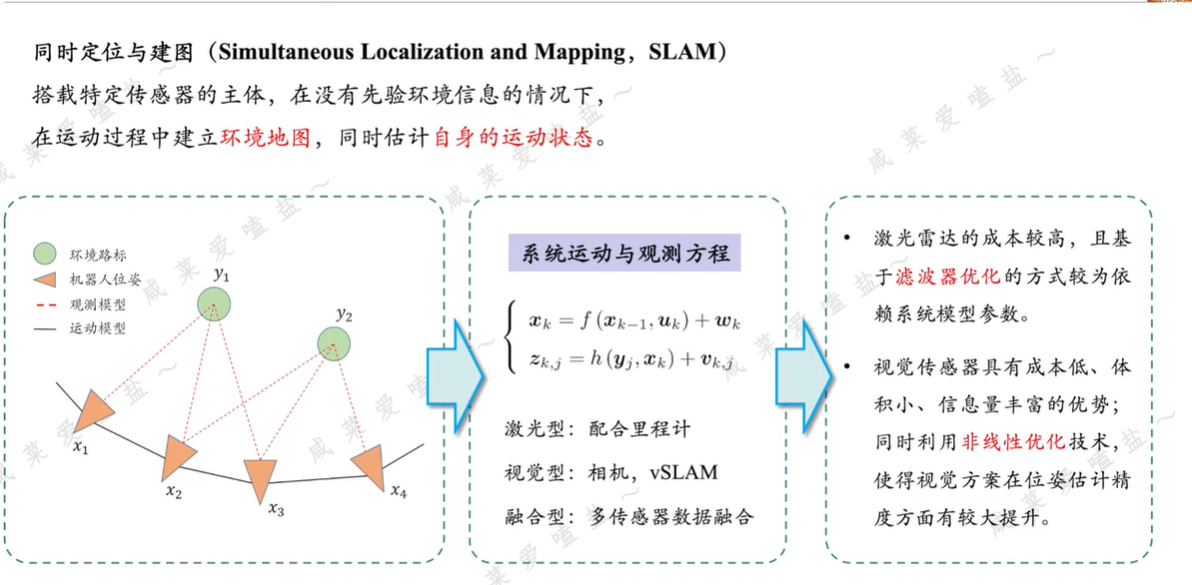

#### 研究现状
视觉里程计（前端）：处理相机拍摄的连续图像，对相邻相片间相机的运动进行估计，分为特征法和直接法。  
回环检测：利用当前图像与历史数据库比对，判断是否达到先前经过的位置，以消除累计误差或进行重定位  
非线性优化（后端）：将视觉里程计与回环检测的输出结果融合后，进行相机位姿与环境地图的优化  
建图：建立与相机轨迹对应的全局环境地图  

##### 直接法    
· 原理：基于光度差异(Photometric Error)，更具图像的像素灰度变化来估计相机运动  
· 发展：SVO、LSD、DSO  
· 优势：在于计算省时，可以构建相对丰富稠密的环境地图
· 缺点：是无法进行有效的回环检测，另外只能在相机位姿有较小变化时起作用。  
##### 特征法    
· 原理：基于几何特征(Geometry Feature)，依赖于相邻图像间的特征匹配  
· 发展：对极几何约束、MonoSLAM、PTAM、ORB-SLAM、ORB-SLAM2、ORB-SLAM3（统称为ORB-SLAM）  
  
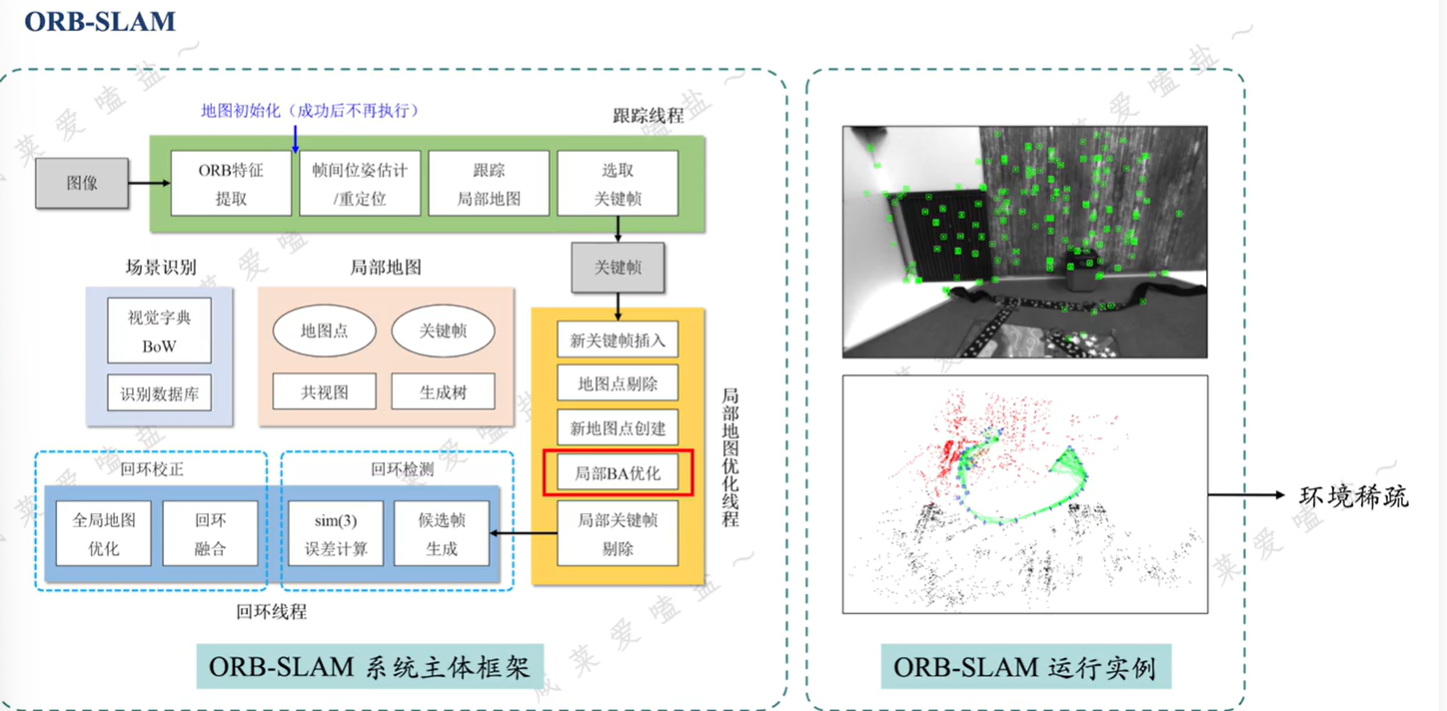  
ORB-SLAM的三个主要工作线程  
跟踪线程（即前端视觉里程计）：通过连续拍摄的图像，来估计相机运动过程中的姿态变化。在位姿估计之前需要对单目相机以及环境地图进行初始化（一旦成功后不再执行）  
局部地图优化线程（即后端优化）：当跟踪线程成功跟踪到局部地图后，根据特定准则判断并抽取关键帧，插入到局部地图中。通过gongshi关系剔除部分冗余的地图点后后端优化线程将视觉里程计与地图点位置作为初始值，进一步对局部地图进行光束调整及BA优化。  
回环线程：目的是保证相机在长时间运行的情况下，仍然能有较为精准的位置估计结果。算法通过采用文本检索研究领域的磁带模型来描述图像,利用词频逆文档频率计分方法,判断当前图像与历史数据库中候选图像的相似性,进而判断相机是否运行到此前经过的位置,算法采用了比局部地图维护更加久远的时间窗口,通过融合时间与全局一致的位置图,尽可能消除累积误差的影响。  
